In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle


In [13]:
# cargar los dos sets de tweets en dataframes
df1 = pd.read_excel('ISIS_Twitter_clean.xlsx')

# print(df1.head())  # debug
# print(df1.tail())  # debug

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df1['Contenido'].values.astype(str), df1['label'], test_size=0.2, random_state=42)


# crear un vectorizador Tfidf para convertir el texto a vectores numéricos
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# crear un modelo de regresión logística
model = LogisticRegression()

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train_vec, y_train)

# predecir los temas de los tweets de prueba
y_pred = model.predict(X_test_vec)

# evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('\n ---------------------------------------- \nPrecisión del modelo:', accuracy)

## Descomentar cada vez que generamos un nuevo modelo para guardar el modelo y el vectorizador en archivos pickle
# # Guardar el modelo en un archivo 'model4.pkl'
# with open('model4.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

# # Guardar el vectorizador en un archivo 'vectorizer.pkl'
# with open('vectorizer4.pkl', 'wb') as vectorizer_file:
#     pickle.dump(vectorizer, vectorizer_file)



 ---------------------------------------- 
Precisión del modelo: 0.9491150442477876


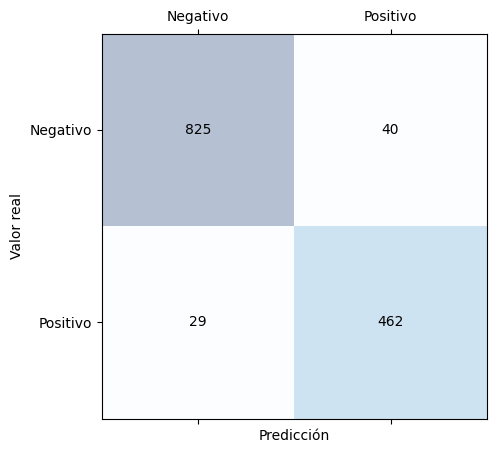

In [14]:
# VISUALIZAMOS LA MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Definir etiquetas de las clases
class_labels = ['Negativo', 'Positivo']

# Matriz de confusión
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión con etiquetas personalizadas
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

# Agregar etiquetas a las celdas de la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

# Configurar etiquetas de los ejes x e y
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



In [15]:
#### ESTA FUNCIÓN HA SIDO YA IMPLEMENTADA EN EL FICHERO PROTOTIPO ####
# SOLO PARA DEBUGGING #

def clasificar_tweets(lista_tweets):
    # crear vectores numéricos a partir del texto de los tweets
    lista_vec = vectorizer.transform(lista_tweets)

    # hacer predicciones de la clase de los tweets
    predicciones = model.predict(lista_vec)

    # identificar cuáles tweets son de la categoría "es_terrorismo"
    es_terrorismo = predicciones == 'N'

    # devolver los tweets clasificados como "terrorismo"
    return [t for i, t in enumerate(lista_tweets) if es_terrorismo[i]]

tweets = pd.read_excel("checkMixClean.xlsx")
print(len(tweets))
tweets = tweets['Contenido'].values.astype(str)
tweets_terrorismo = clasificar_tweets(tweets)
print(len(tweets_terrorismo))

for i, tweet in enumerate(tweets_terrorismo, start=1):
    print(f"{i}. {tweet}")


218
23
1. periscope rosscaneva rt mitney rosscaneva periscope paris bataclan night terrorist attack
2. periscope rosscaneva rt jmoon rosscaneva periscope paris bataclan night terrorist attack
3. paris bataclan theater received threat proisrael event attack via
4. bataclan attack video people flee paris theater second terrorist via
5. gunfire bataclan concert hall paris terrorist attack via
6. british victim bataclan attack paris named nick alexander
7. british victim bataclan attack paris named nick alexander
8. man began playing one world famous peace anthem grand piano outside bataclan theater
9. paris attack bataclan assault leave dead via
10. ucwradio british victim bataclan attack paris named nick alexander news
11. british victim bataclan attack paris named nick alexander
12. british victim bataclan attack paris named nick alexander
13. dont want radicalism xenophobia division hate le bataclan
14. tragic scope terrorist attack continue people inside concert venue bataclan share
1